## Notebook 11
### Giorgio Stucchi - 969107

# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

### Overview 

In this notebook our task will be to perform machine learning regression on noisy data with a Neural Network (NN).

We will explore how the ability to fit depends on the structure of the NN. The goal is also to build intuition about why prediction is difficult.

### The Prediction Problem

Consider a probabilistic process that gives rise to labeled data $(x,y)$. The data is generated by drawing samples from the equation

$$
    y_i= f(x_i) + \eta_i,
$$

where $f(x_i)$ is some fixed, but (possibly unknown) function, and $\eta_i$ is a Gaussian, uncorrelate noise variable such that

$$
\langle \eta_i \rangle=0 \\
\langle \eta_i \eta_j \rangle = \delta_{ij} \sigma
$$

We will refer to the $f(x_i)$ as the **true features** used to generate the data. 

To make predictions, we will consider a NN that depends on its parameters, weights and biases. The functions that the NN can model respresent the **model class** that we are using to try to model the data and make predictions.

To learn the parameters of the NN, we will train our models on a **training data set** and then test the effectiveness of the NN on a *different* dataset, the **validation data set**. The reason we must divide our data into a training and test dataset is that the point of machine learning is to make accurate predictions about new data we have not seen.

To measure our ability to predict, we will learn our parameters by fitting our training dataset and then making predictions on our test data set. One common measure of predictive  performance of our algorithm is to compare the predictions,$\{y_j^\mathrm{pred}\}$, to the true values $\{y_j\}$. A commonly employed measure for this is the sum of the mean square-error (MSE) on the test set:
$$
MSE= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

We will try to get a qualitative picture by examining plots on validation and training data.

### Linear fit

We start by considering the very simple case:
$$
f(x)=2x+1
$$

Let's start defining the parameters of an ideal linear function which we are going to predict through a neural network regression

In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Now let's generate a set of input data which will slightly deviate from our ideal behaviour using a random noise (that actually is set to zero):

In [2]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.3 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

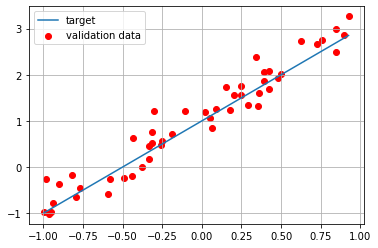

In [3]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

If you remember how a single node of a neural network works, you can easily spot that **just a single neuron can make the job**. So let's start using a simple Sequential model with just one layer on one neuron only!

In [4]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,)))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

2023-06-11 18:09:18.955739: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-11 18:09:19.033553: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-11 18:09:19.037222: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-11 18:09:20.333879: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [5]:
# get a summary of our composed model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


We are now going to train our model, that is we feed the neuron with the set of training pair x, y_train from which the optimizer will find the best weights to minimize the Mean Square Error loss function (out linear regression function).

In [6]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=60,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/60
16/16 [==============================] - 1s 19ms/step - loss: 0.9459 - mse: 0.9459 - val_loss: 0.8585 - val_mse: 0.8585
Epoch 2/60
16/16 [==============================] - 0s 10ms/step - loss: 0.5834 - mse: 0.5834 - val_loss: 0.5624 - val_mse: 0.5624
Epoch 3/60
16/16 [==============================] - 0s 8ms/step - loss: 0.3832 - mse: 0.3832 - val_loss: 0.3936 - val_mse: 0.3936
Epoch 4/60
16/16 [==============================] - 0s 7ms/step - loss: 0.2722 - mse: 0.2722 - val_loss: 0.2906 - val_mse: 0.2906
Epoch 5/60
16/16 [==============================] - 0s 7ms/step - loss: 0.2071 - mse: 0.2071 - val_loss: 0.2289 - val_mse: 0.2289
Epoch 6/60
16/16 [==============================] - 0s 7ms/step - loss: 0.1692 - mse: 0.1692 - val_loss: 0.1893 - val_mse: 0.1893
Epoch 7/60
16/16 [==============================] - 0s 7ms/step - loss: 0.1455 - mse: 0.1455 - val_loss: 0.1639 - val_mse: 0.1639
Epoch 8/60
16/16 [==============================] - 0s 7ms/step - loss: 0.1303 - mse: 0.

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [7]:
# return weights and biases
model.get_weights()

[array([[2.0304668]], dtype=float32), array([0.96645725], dtype=float32)]

In [8]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 8ms/step - loss: 0.1007 - mse: 0.1007

Test loss: 0.10073627531528473
Test accuracy: 0.10073627531528473


In [9]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 10ms/step - loss: 0.0015 - mse: 0.0015

Test loss: 0.0015282095409929752
Test accuracy: 0.0015282095409929752


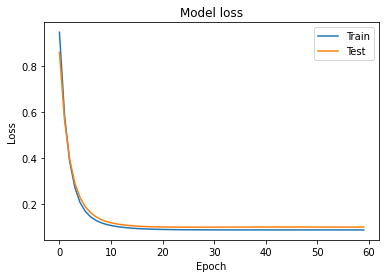

In [10]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 4ms/step


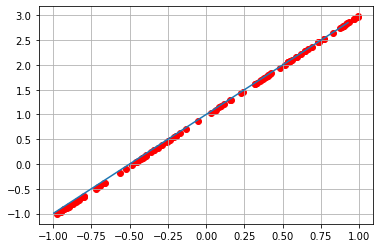

In [11]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.1

In order to make practice with NN, explore how does the previous linear regression depend on the number of epochs, $N_{\mathrm{epochs}}$, the number of data points $N_{\mathrm{train}}$ and on the noise $\sigma$. Try to improve the previous result operating on these parameters.

Now, let's explore how the number of epochs, Nepochs, the number of data points, Ntrain, and the noise, σ, affect the linear regression process:

1. Number of epochs (Nepochs):
   - Increasing the number of epochs allows the algorithm to make more iterations over the training data, potentially improving the accuracy of the learned model.
   - However, there is a trade-off. If Nepochs is too high, the model might start overfitting the training data, meaning it becomes too specialized in capturing noise or outliers in the dataset and performs poorly on unseen data.


2. Number of data points (Ntrain):
   - A larger training dataset generally provides more information for the model to learn from.
   - With more data points, the model has a better chance of capturing the underlying pattern and reducing the impact of random noise.
   - However, a very large dataset can also increase the computational complexity and training time.
   - It is essential to strike a balance between having a sufficiently large dataset and avoiding data redundancy or unnecessary computational burden.


3. Noise level (σ):
   - The presence of noise in the data affects the accuracy of the learned linear regression model.
   - Higher noise levels, represented by larger σ, introduce more variability and randomness into the dataset.
   - As the noise level increases, the model may struggle to find a precise fit, leading to larger errors and decreased predictive performance.

### Exercise 11.2

Try to extend the model to obtain a reasonable fit of the following polynomial of order 3:

$$
f(x)=4-3x-2x^2+3x^3
$$
for $x \in [-1,1]$.

In order to make practice with NN, explore reasonable different choices for:

- the number of layers
- the number of neurons in each layer
- the activation function
- the optimizer
- the loss function
  
Make graphs comparing fits for different NNs.
Check your NN models by seeing how well your fits predict newly generated test data (including on data outside the range you fit. How well do your NN do on points in the range of $x$ where you trained the model? How about points outside the original training data set? 
Summarize what you have learned about the relationship between model complexity (number of parameters), goodness of fit on training data, and the ability to predict well.

In [12]:
def poly(x):
    a=4.
    b=-3.
    c=-2.
    d=3.
    
    return a + b*x + c*x**2 + d*x**3

In [13]:
# target parameters of f(x) = 4-3x-2x^2+3x^3
b = -2
a = 3
c = -3 
d = 4 # intersect

In [14]:
# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 10000)
x_valid = np.random.uniform(-1, 1, 1000)
x_valid.sort()
y_target = c * x_valid + d + b * x_valid *x_valid + a * x_valid * x_valid *x_valid  # ideal (target) linear function

sigma = 0.3 # noise standard deviation, for the moment it is absent
y_train = np.random.normal( c * x_train + d + b * x_train *x_train + a * x_train * x_train *x_train, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(c * x_valid + d + b * x_valid *x_valid + a * x_valid * x_valid *x_valid, sigma)

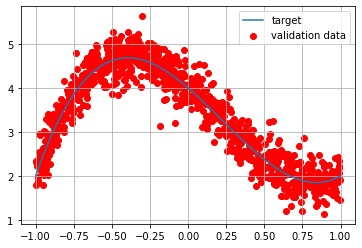

In [15]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

We play around with the following models.

In [16]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model_1 = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    keras.layers.Dense(1)
])

model_2 = keras.Sequential([
    keras.layers.Dense(64, activation='tanh', input_shape=(1,)),
    keras.layers.Dense(1)
])

model_3 = keras.Sequential([
    keras.layers.Dense(32, activation='tanh', input_shape=(1,)),
    keras.layers.Dense(32, activation='tanh'),
    keras.layers.Dense(1)
])

model_4 = keras.Sequential([
    keras.layers.Dense(16, activation='tanh', input_shape=(1,)),
    keras.layers.Dense(16, activation='tanh'),
    keras.layers.Dense(16, activation='tanh'),
    keras.layers.Dense(1)
])


# compile the model choosing optimizer, loss and metrics objects
model_1.compile(optimizer='adam', loss='mse', metrics=['mse'])
model_2.compile(optimizer='adam', loss='mse', metrics=['mse'])
model_3.compile(optimizer='adam', loss='mse', metrics=['mse'])
model_4.compile(optimizer='adam', loss='mse', metrics=['mse'])

We keep the optimizer and loss the same for all models as to not lose control of the effect of adding layers and/or neurons to the layers. Adam optimizer seems to work best so we choose Adam.

In [17]:
# get a summary of our composed model
model_1.summary()
model_2.summary()
model_3.summary()
model_4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                128       
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                128       
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 193
Trainable params

In [18]:
# fit the model using training dataset
# over 50 epochs of 32 batch size each
# report training progress against validation data
history1 = model_1.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
history2 = model_2.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
history3 = model_3.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))
history4 = model_4.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
313/313 [==============================] - 2s 5ms/step - loss: 4.4079 - mse: 4.4079 - val_loss: 0.6749 - val_mse: 0.6749
Epoch 2/50
313/313 [==============================] - 1s 4ms/step - loss: 0.5816 - mse: 0.5816 - val_loss: 0.5086 - val_mse: 0.5086
Epoch 3/50
313/313 [==============================] - 1s 4ms/step - loss: 0.3935 - mse: 0.3935 - val_loss: 0.3087 - val_mse: 0.3087
Epoch 4/50
313/313 [==============================] - 1s 4ms/step - loss: 0.2432 - mse: 0.2432 - val_loss: 0.1996 - val_mse: 0.1996
Epoch 5/50
313/313 [==============================] - 1s 4ms/step - loss: 0.1743 - mse: 0.1743 - val_loss: 0.1521 - val_mse: 0.1521
Epoch 6/50
313/313 [==============================] - 1s 4ms/step - loss: 0.1425 - mse: 0.1425 - val_loss: 0.1308 - val_mse: 0.1308
Epoch 7/50
313/313 [==============================] - 1s 4ms/step - loss: 0.1264 - mse: 0.1264 - val_loss: 0.1219 - val_mse: 0.1219
Epoch 8/50
313/313 [==============================] - 1s 4ms/step - loss: 0.

Epoch 13/50
313/313 [==============================] - 1s 4ms/step - loss: 0.1184 - mse: 0.1184 - val_loss: 0.1161 - val_mse: 0.1161
Epoch 14/50
313/313 [==============================] - 1s 3ms/step - loss: 0.1163 - mse: 0.1163 - val_loss: 0.1136 - val_mse: 0.1136
Epoch 15/50
313/313 [==============================] - 1s 3ms/step - loss: 0.1149 - mse: 0.1149 - val_loss: 0.1112 - val_mse: 0.1112
Epoch 16/50
313/313 [==============================] - 1s 4ms/step - loss: 0.1130 - mse: 0.1130 - val_loss: 0.1100 - val_mse: 0.1100
Epoch 17/50
313/313 [==============================] - 1s 4ms/step - loss: 0.1119 - mse: 0.1119 - val_loss: 0.1088 - val_mse: 0.1088
Epoch 18/50
313/313 [==============================] - 1s 4ms/step - loss: 0.1101 - mse: 0.1101 - val_loss: 0.1097 - val_mse: 0.1097
Epoch 19/50
313/313 [==============================] - 1s 4ms/step - loss: 0.1089 - mse: 0.1089 - val_loss: 0.1116 - val_mse: 0.1116
Epoch 20/50
313/313 [==============================] - 2s 6ms/step - 

313/313 [==============================] - 1s 4ms/step - loss: 0.0920 - mse: 0.0920 - val_loss: 0.0931 - val_mse: 0.0931
Epoch 25/50
313/313 [==============================] - 1s 4ms/step - loss: 0.0923 - mse: 0.0923 - val_loss: 0.0934 - val_mse: 0.0934
Epoch 26/50
313/313 [==============================] - 1s 4ms/step - loss: 0.0917 - mse: 0.0917 - val_loss: 0.0921 - val_mse: 0.0921
Epoch 27/50
313/313 [==============================] - 1s 4ms/step - loss: 0.0918 - mse: 0.0918 - val_loss: 0.0904 - val_mse: 0.0904
Epoch 28/50
313/313 [==============================] - 2s 5ms/step - loss: 0.0920 - mse: 0.0920 - val_loss: 0.0927 - val_mse: 0.0927
Epoch 29/50
313/313 [==============================] - 1s 5ms/step - loss: 0.0921 - mse: 0.0921 - val_loss: 0.0912 - val_mse: 0.0912
Epoch 30/50
313/313 [==============================] - 2s 5ms/step - loss: 0.0919 - mse: 0.0919 - val_loss: 0.0921 - val_mse: 0.0921
Epoch 31/50
313/313 [==============================] - 2s 5ms/step - loss: 0.0921

Epoch 36/50
313/313 [==============================] - 1s 4ms/step - loss: 0.0914 - mse: 0.0914 - val_loss: 0.0910 - val_mse: 0.0910
Epoch 37/50
313/313 [==============================] - 1s 4ms/step - loss: 0.0920 - mse: 0.0920 - val_loss: 0.0926 - val_mse: 0.0926
Epoch 38/50
313/313 [==============================] - 1s 4ms/step - loss: 0.0914 - mse: 0.0914 - val_loss: 0.0957 - val_mse: 0.0957
Epoch 39/50
313/313 [==============================] - 1s 4ms/step - loss: 0.0916 - mse: 0.0916 - val_loss: 0.0913 - val_mse: 0.0913
Epoch 40/50
313/313 [==============================] - 1s 4ms/step - loss: 0.0918 - mse: 0.0918 - val_loss: 0.0903 - val_mse: 0.0903
Epoch 41/50
313/313 [==============================] - 1s 4ms/step - loss: 0.0910 - mse: 0.0910 - val_loss: 0.0912 - val_mse: 0.0912
Epoch 42/50
313/313 [==============================] - 1s 4ms/step - loss: 0.0913 - mse: 0.0913 - val_loss: 0.0919 - val_mse: 0.0919
Epoch 43/50
313/313 [==============================] - 2s 5ms/step - 

4/4 [==============================] - 0s 4ms/step


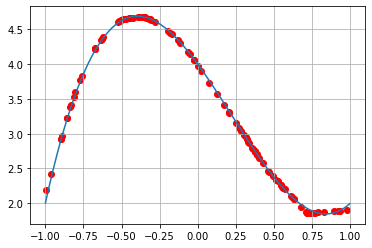

4/4 [==============================] - 0s 5ms/step


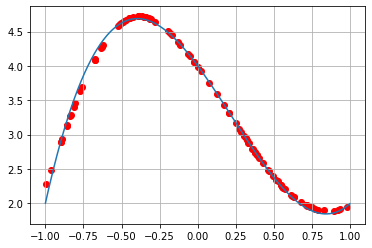

4/4 [==============================] - 0s 4ms/step


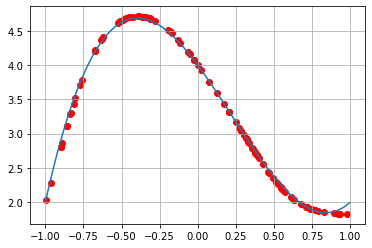

4/4 [==============================] - 0s 4ms/step


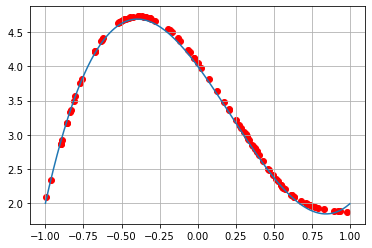

In [19]:
x_predicted_1 = np.random.uniform(-1, 1, 100)
y_predicted_1 = model_1.predict(x_predicted_1)
plt.scatter(x_predicted_1, y_predicted_1,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

y_predicted_2 = model_2.predict(x_predicted_1)
plt.scatter(x_predicted_1, y_predicted_2,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

y_predicted_3 = model_3.predict(x_predicted_1)
plt.scatter(x_predicted_1, y_predicted_3,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

y_predicted_4 = model_4.predict(x_predicted_1)
plt.scatter(x_predicted_1, y_predicted_4,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

The second model gives the best results. None of the other models above seems however able to capture the "tail" of the function appropriately.Plenty of time (epochs) was given to all the models, as one can see from the loss function being more or less stable after the 20th-30th epoch.

In [20]:
scores = []
for k in range(1, 5):
    model = globals()['model_' + str(k)]  # Get the model dynamically
    score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
    scores.append(score)

# Print performance
for i, score in enumerate(scores):
    print()
    print('Model', i+1)
    print('Test loss:', score)


32/32 [==============================] - 0s 6ms/step - loss: 0.0905 - mse: 0.0905

Model 1
Test loss: [0.09106939285993576, 0.09106939285993576]

Model 2
Test loss: [0.09208280593156815, 0.09208280593156815]

Model 3
Test loss: [0.09117363393306732, 0.09117363393306732]

Model 4
Test loss: [0.09046515822410583, 0.09046515822410583]


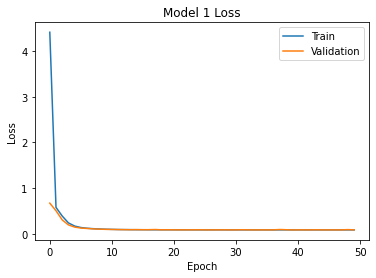

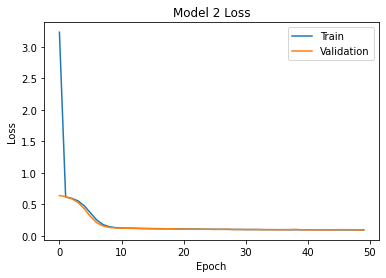

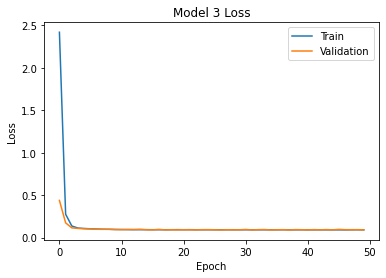

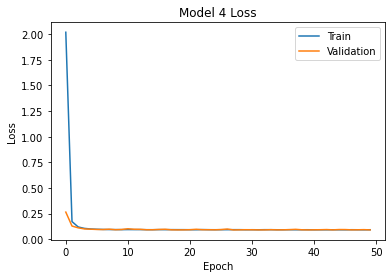

In [21]:
histories = [history1, history2, history3, history4]
model_names = ['Model 1', 'Model 2', 'Model 3', 'Model 4']

# Plot training & validation loss values for each model
for history, model_name in zip(histories, model_names):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(model_name + ' Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.show()

4/4 [==============================] - 0s 4ms/step


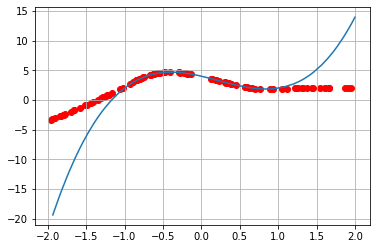

4/4 [==============================] - 0s 3ms/step


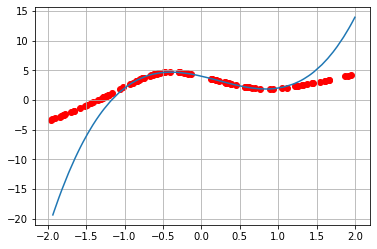

4/4 [==============================] - 0s 4ms/step


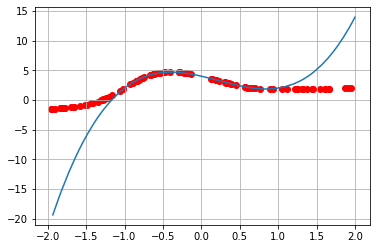

4/4 [==============================] - 0s 4ms/step


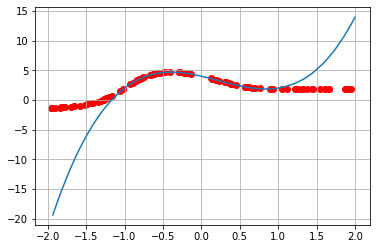

In [22]:
x_target1 = np.random.uniform(-2,2,100)
x_target1.sort()
y_target1 = poly(x_target1)
x_predicted_1 = np.random.uniform(-2, 2, 100)
y_predicted_1 = model_1.predict(x_predicted_1)
plt.scatter(x_predicted_1, y_predicted_1,color='r')
plt.plot(x_target1, y_target1)
plt.grid(True)
plt.show()

y_predicted_2 = model_2.predict(x_predicted_1)
plt.scatter(x_predicted_1, y_predicted_2,color='r')
plt.plot(x_target1, y_target1)
plt.grid(True)
plt.show()

y_predicted_3 = model_3.predict(x_predicted_1)
plt.scatter(x_predicted_1, y_predicted_3,color='r')
plt.plot(x_target1, y_target1)
plt.grid(True)
plt.show()

y_predicted_4 = model_4.predict(x_predicted_1)
plt.scatter(x_predicted_1, y_predicted_4,color='r')
plt.plot(x_target1, y_target1)
plt.grid(True)
plt.show()

The model wasn't trained to predict the behaviour outside of the range (-1,1), so the results are poor.

### Exercise 11.3
  
Try to extend the model to fit a simple trigonometric 2D function such as $f(x,y) = \sin(x^2+y^2)$ in the range $x \in [-3/2,3/2]$ and $y \in [-3/2,3/2]$.

In [14]:
def func(x,y):
    return np.sin(x**2+y**2)

In [15]:

# generate training inputs
p_train = np.random.uniform(-1.5, 1.5, size=(10000,2))

p_valid = np.random.uniform(-1.5, 1.5, size=(1000,2))

sigma = 0. # noise standard deviation, for the moment it is absent
z_train = np.random.normal(func(p_train[:,0],p_train[:,1]), sigma) # actual measures from which we want to guess regression parameters
z_valid = np.random.normal(func(p_valid[:,0],p_valid[:,1]), sigma)

/tmp/ipykernel_11346/849120680.py:12: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


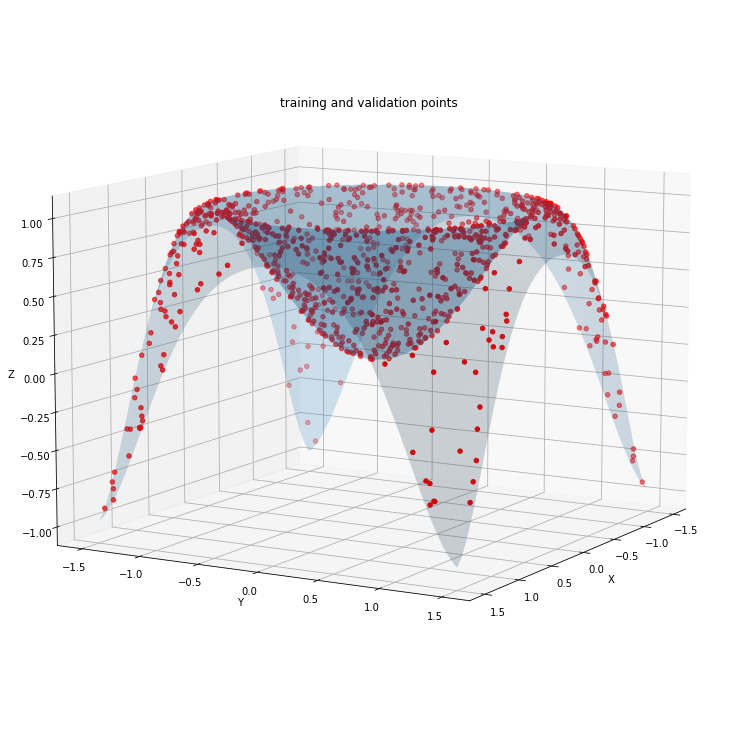

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


#generating training and validation data
X, Y = np.meshgrid(np.linspace(-1.5,1.5,100),np.linspace(-1.5,1.5,100))

z_target = func(X,Y)  # ideal (target) polinomial function

fig = plt.figure(figsize=(10,10))
fig.suptitle("training and validation points",y=0.875)
ax = Axes3D(fig)
ax.view_init(10,30)

# Plot the surface
ax.scatter(p_valid[:,0],p_valid[:,1], z_valid, label='validation points', color='red', depthshade='False')
ax.plot_surface(X,Y, z_target, label='target', alpha=0.2)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


In [17]:
model = tf.keras.Sequential()
model.add(Dense(32, input_shape=(2,),activation="tanh"))
model.add(Dense(32, activation="tanh"))
model.add(Dense(1))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])
#model.summary()

In [25]:
history = model.fit(x=p_train, y=z_train, 
          batch_size=32, epochs=100,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(p_valid, z_valid), verbose=1)

Epoch 1/100
313/313 [==============================] - 1s 3ms/step - loss: 0.0529 - mse: 0.0529 - val_loss: 0.0510 - val_mse: 0.0510
Epoch 2/100
313/313 [==============================] - 1s 3ms/step - loss: 0.0519 - mse: 0.0519 - val_loss: 0.0511 - val_mse: 0.0511
Epoch 3/100
313/313 [==============================] - 1s 3ms/step - loss: 0.0512 - mse: 0.0512 - val_loss: 0.0490 - val_mse: 0.0490
Epoch 4/100
313/313 [==============================] - 1s 3ms/step - loss: 0.0502 - mse: 0.0502 - val_loss: 0.0514 - val_mse: 0.0514
Epoch 5/100
313/313 [==============================] - 1s 4ms/step - loss: 0.0494 - mse: 0.0494 - val_loss: 0.0490 - val_mse: 0.0490
Epoch 6/100
313/313 [==============================] - 1s 4ms/step - loss: 0.0483 - mse: 0.0483 - val_loss: 0.0475 - val_mse: 0.0475
Epoch 7/100
313/313 [==============================] - 1s 3ms/step - loss: 0.0473 - mse: 0.0473 - val_loss: 0.0454 - val_mse: 0.0454
Epoch 8/100
313/313 [==============================] - 1s 4ms/step - 

32/32 [==============================] - 0s 4ms/step


/tmp/ipykernel_11346/3178705069.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


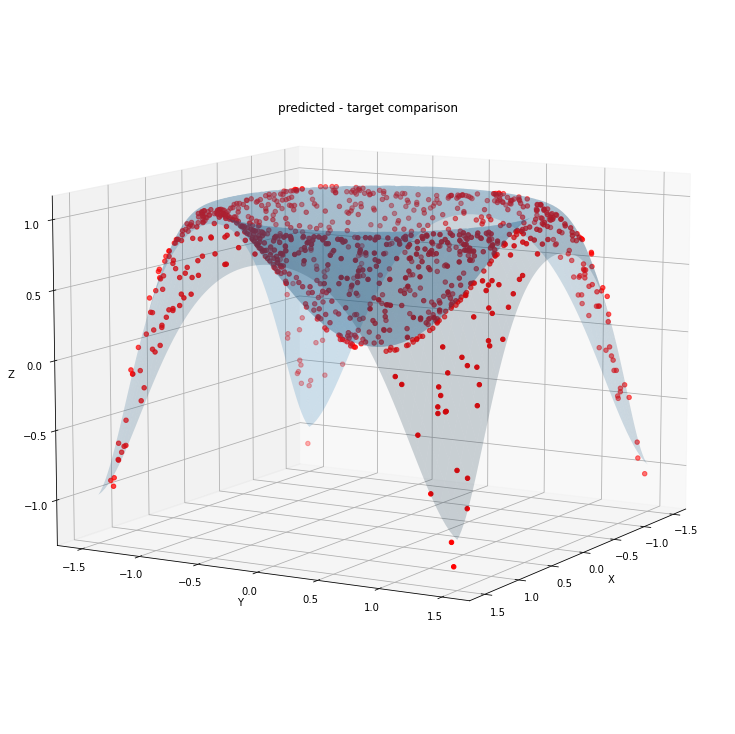

In [26]:
p_predicted = np.random.uniform(-1.5, 1.5, size=(1000, 2))
z_predicted = model.predict(p_predicted)

# Create matplotlib Figure and Axes
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.view_init(10,30)
plt.title("predicted - target comparison",y=0.92)

# Plot the surface
ax.scatter(p_predicted[:,0],p_predicted[:,1], z_predicted, label='prediction points', color='red', depthshade='False')
ax.plot_surface(X,Y, z_target, label='target', alpha=0.2)

#ax.set_zlim(0,1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

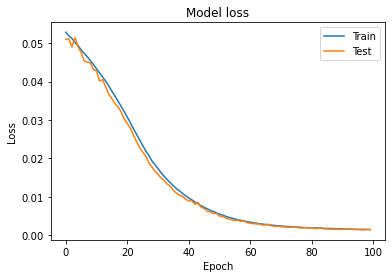

final training loss: 0.0014743086649104953
final test loss: 0.0014643828617408872 


In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()
print(f"final training loss: {history.history['loss'][-1]}\nfinal test loss: {history.history['val_loss'][-1]} ")

Ideas to meditate on these exercises and judge your results can be found <a href=https://xkcd.com/2048/>here</a>

### <span style="color:green">Supplementary material: Keras model.fit available callbacks</span>

The .fit method can also get <a href=https://keras.io/callbacks/>callback</a> functions which can be used to customize the fitting procedure with special actions.

Keras provides some predefined callbacks to feed in, among them for example:
- **TerminateOnNaN()**: that terminates training when a NaN loss is encountered
- **ModelCheckpoint(filepath)**: that save the model after every epoch
- **EarlyStopping()**: which stop training when a monitored quantity has stopped improving

You can select one or more callback and pass them as a list to the callback argument of the fit method.

Now we are going to construct a callback object to represent how estimated parameters are converging during the training procedure

In [12]:
from IPython.display import clear_output

class PlotCurrentEstimate(tf.keras.callbacks.Callback):
    def __init__(self, x_valid, y_valid):
        """Keras Callback which plot current model estimate against reference target"""
        
        # convert numpy arrays into lists for plotting purposes
        self.x_valid = list(x_valid[:])
        self.y_valid = list(y_valid[:])
        self.iter=0

    def on_epoch_end(self, epoch, logs={}):
        
        temp = self.model.predict(self.x_valid, batch_size=None, verbose=False, steps=None)
        self.y_curr = list(temp[:]) # convert numpy array into list
        
        self.iter+=1
        if self.iter%10 == 0:
            clear_output(wait=True)            
            self.eplot = plt.subplot(1,1,1)
            self.eplot.clear()     
            self.eplot.scatter(self.x_valid, self.y_curr, color="blue", s=4, marker="o", label="estimate")
            self.eplot.scatter(self.x_valid, self.y_valid, color="red", s=4, marker="x", label="valid")
            self.eplot.legend()

            plt.show()

We will use also an EarlyStopping callback on the val_loss quantity. This will stop the training process as soon as the val_loss quantity does not improve anymore after an amount of epochs, preventing a long time of wated computation to take over without useful results.

<code>keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)</code>

Arguments:

- <code>monitor</code>: quantity to be monitored. 
- <code>min_delta:</code> minimum change in the monitored quantity to qualify as an improvement, i.e. an absolute change of less than min_delta, will count as no improvement. 
- <code>patience:</code> number of epochs with no improvement after which training will be stopped. 
- <code>verbose:</code> verbosity mode. 
- <code>mode:</code> one of {auto, min, max}. In min mode, training will stop when the quantity monitored has stopped decreasing; in max mode it will stop when the quantity monitored has stopped increasing; in auto mode, the direction is automatically inferred from the name of the monitored quantity. 
- <code>baseline:</code> Baseline value for the monitored quantity to reach. Training will stop if the model doesn't show improvement over the baseline. 
- <code>restore_best_weights:</code> whether to restore model weights from the epoch with the best value of the monitored quantity. If False, the model weights obtained at the last step of training are used.

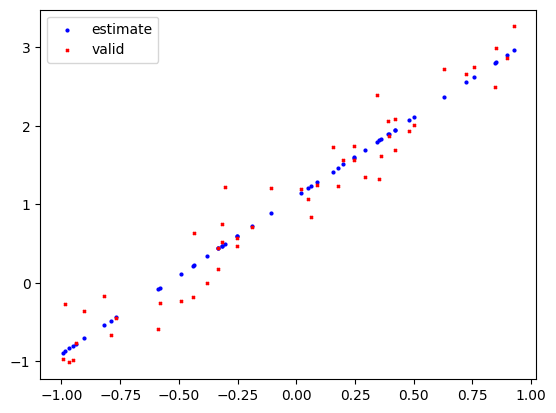

2/2 [==============================] - 0s 101ms/step - loss: 0.0808 - mse: 0.0808 - val_loss: 0.0808 - val_mse: 0.0808


[array([[2.0087578]], dtype=float32), array([1.1064383], dtype=float32)]

In [13]:
plot_estimate = PlotCurrentEstimate(x_valid, y_valid)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                  min_delta=0, patience=100, mode='auto')

model.fit(x_valid, y_valid, batch_size=32, epochs=150,
          validation_data=(x_valid, y_valid),
          callbacks=[ plot_estimate, earlystop]
          )

model.get_weights()